In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preparing Data

In [ ]:
#@title Read File
league=pd.read_csv("/content/premier-league.csv")
league.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993


In [ ]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           22975 non-null  object 
 1   player_name         22975 non-null  object 
 2   age                 22960 non-null  float64
 3   position            22975 non-null  object 
 4   club_involved_name  22975 non-null  object 
 5   fee                 22971 non-null  object 
 6   transfer_movement   22975 non-null  object 
 7   transfer_period     22975 non-null  object 
 8   fee_cleaned         8739 non-null   float64
 9   league_name         22975 non-null  object 
 10  year                22975 non-null  int64  
 11  season              22975 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.1+ MB


In [ ]:
league.nunique()

club_name               50
player_name           5797
age                     33
position                16
club_involved_name    1336
fee                   2250
transfer_movement        2
transfer_period          2
fee_cleaned            746
league_name              1
year                    30
season                  30
dtype: int64

In [ ]:
league.isna().sum()

club_name                 0
player_name               0
age                      15
position                  0
club_involved_name        0
fee                       4
transfer_movement         0
transfer_period           0
fee_cleaned           14236
league_name               0
year                      0
season                    0
dtype: int64

In [ ]:
#@title Drop League Name "Single Value" and year "Redundant with season" 
league=league.drop(['league_name','year'],axis=1)


In [ ]:
league[league['fee_cleaned'].isna()]['fee'].nunique()


1425

In [ ]:
grouped=league.groupby('fee').size()

grouped


fee
-                         1982
?                         1045
End of loanApr 1, 1993       3
End of loanApr 1, 1996       1
End of loanApr 1, 1997       5
                          ... 
€95Th.                       2
€96Th.                       1
€975Th.                      7
€990Th.                      1
€9Th.                        1
Length: 2250, dtype: int64


In [ ]:
#@title Drop Players with No Fees information "4 players"
league[league['fee'].isna()]


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,year
4013,Southampton FC,Patrice Kobenan Tano,16.0,attack,KSK Beveren,NaN,in,Summer,NaN,1999
4703,Southampton FC,Patrice Kobenan Tano,17.0,attack,KV Mechelen,NaN,out,Summer,NaN,2000
11253,Wigan Athletic,Peter Moore,19.0,Centre-Back,Northwich Vic,NaN,out,Summer,NaN,2008
12169,Portsmouth FC,Scott Harris,23.0,Central Midfield,Redhill,NaN,out,Summer,NaN,2009


In [ ]:
#@title Drop Patrice Kobenan Tano No Enough Info

league[league['player_name']=="Patrice Kobenan Tano"]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,year
4013,Southampton FC,Patrice Kobenan Tano,16.0,attack,KSK Beveren,NaN,in,Summer,NaN,1999
4703,Southampton FC,Patrice Kobenan Tano,17.0,attack,KV Mechelen,NaN,out,Summer,NaN,2000


In [ ]:
#@title Drop Peter Moore Redundant Record

league[league['player_name']=="Peter Moore"]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,year
10415,Wigan Athletic,Peter Moore,18.0,Centre-Back,Wigan U18,-,in,Summer,NaN,2007
11243,Wigan Athletic,Peter Moore,19.0,Centre-Back,Northwich Vic,free transfer,out,Summer,0.0,2008
11253,Wigan Athletic,Peter Moore,19.0,Centre-Back,Northwich Vic,NaN,out,Summer,NaN,2008


In [ ]:
#@title Drop Scott Harris Record No Enough Info
league[league['player_name']=="Scott Harris"]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,year
10178,Portsmouth FC,Scott Harris,21.0,Central Midfield,Portsmouth U21,-,in,Summer,NaN,2007
12169,Portsmouth FC,Scott Harris,23.0,Central Midfield,Redhill,NaN,out,Summer,NaN,2009


In [ ]:
league['fee_cleaned'].fillna(value=0,inplace=True)
league.isna().sum()
league.head()


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,0.00,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,0.00,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,0.00,1992/1993


# Visualizations

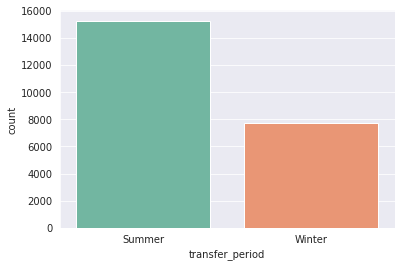

In [ ]:
#Total transfers in summer and winter
sns.countplot(x=league['transfer_period'],data=league)

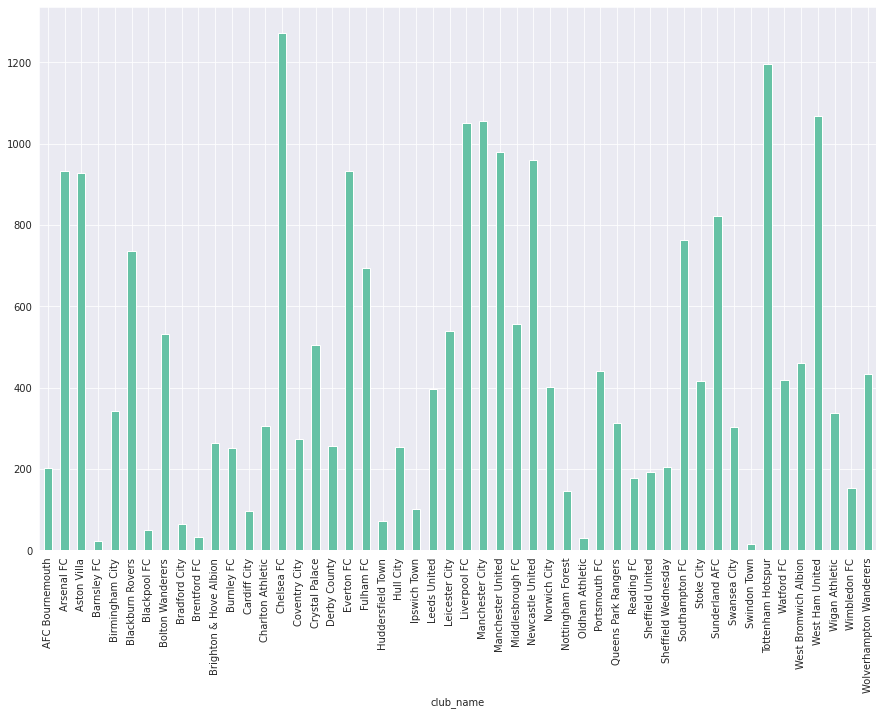

In [ ]:
#Total Transfers for each Team 
plt.figure(figsize= (15,10))
league.groupby(['club_name'])["transfer_period"].count().plot(kind = "bar")


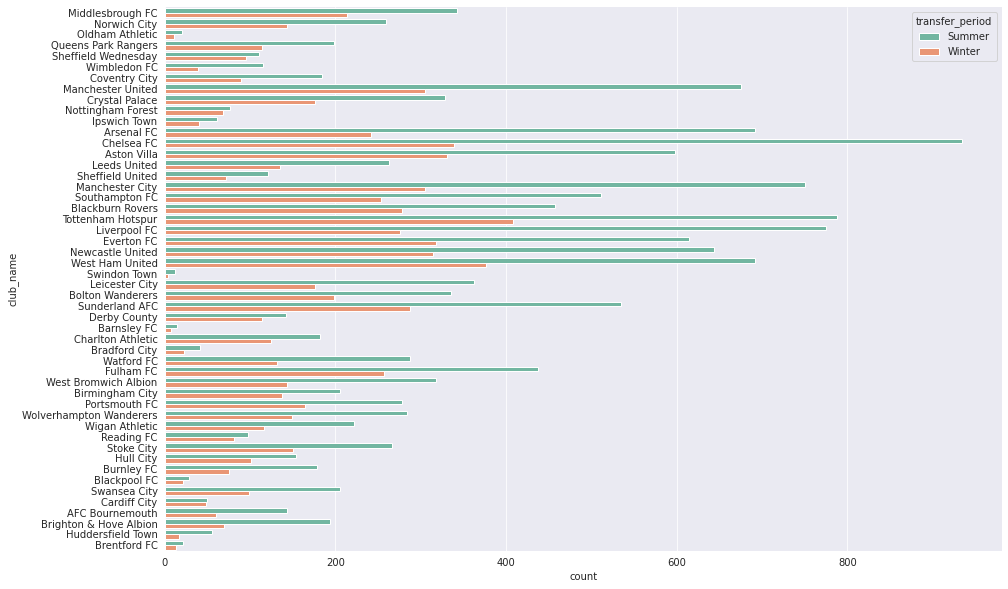

In [ ]:
#Every Team transfers in winter and summer each one alone
plt.figure(figsize= (15,10))
sns.countplot(data=league, y="club_name", hue="transfer_period")
sns.despine()



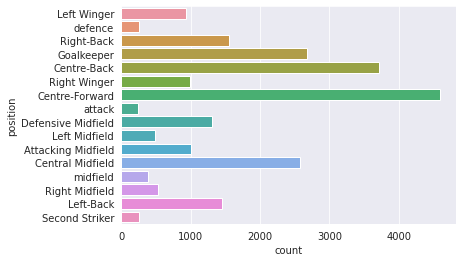

In [ ]:
#Count of transfers for every position
sns.countplot(y=league['position'],data=league)

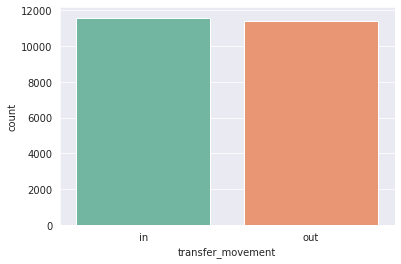

In [ ]:
#Total transfers for every team
sns.countplot(x=league['transfer_movement'],data=league)

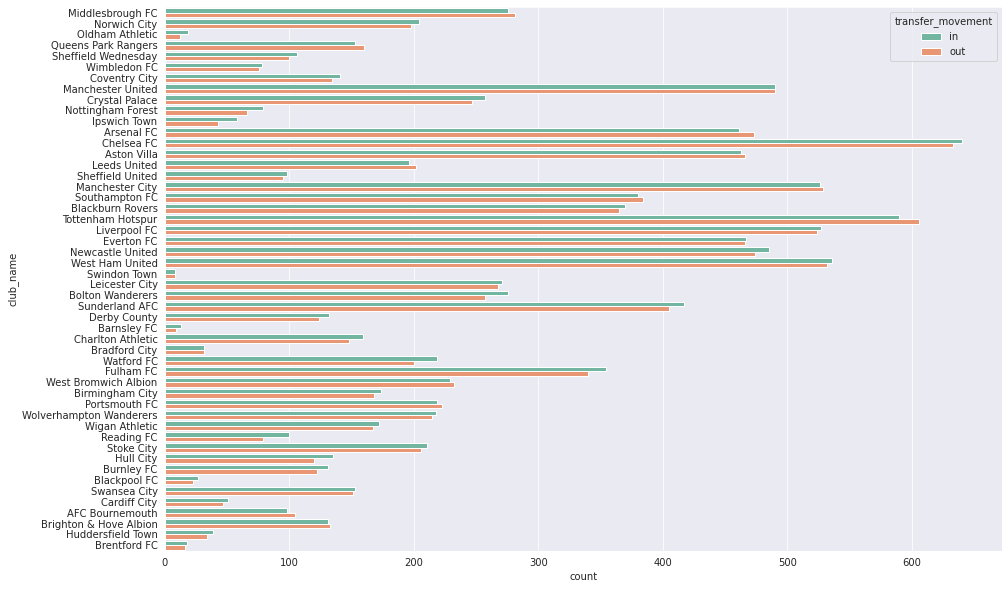

In [ ]:
#Transfer In and Out for every Team
plt.figure(figsize= (15,10))
sns.countplot(data=league, y="club_name", hue="transfer_movement")

#sns.countplot(x=league['club_name'], hue=league.transfer_movement)


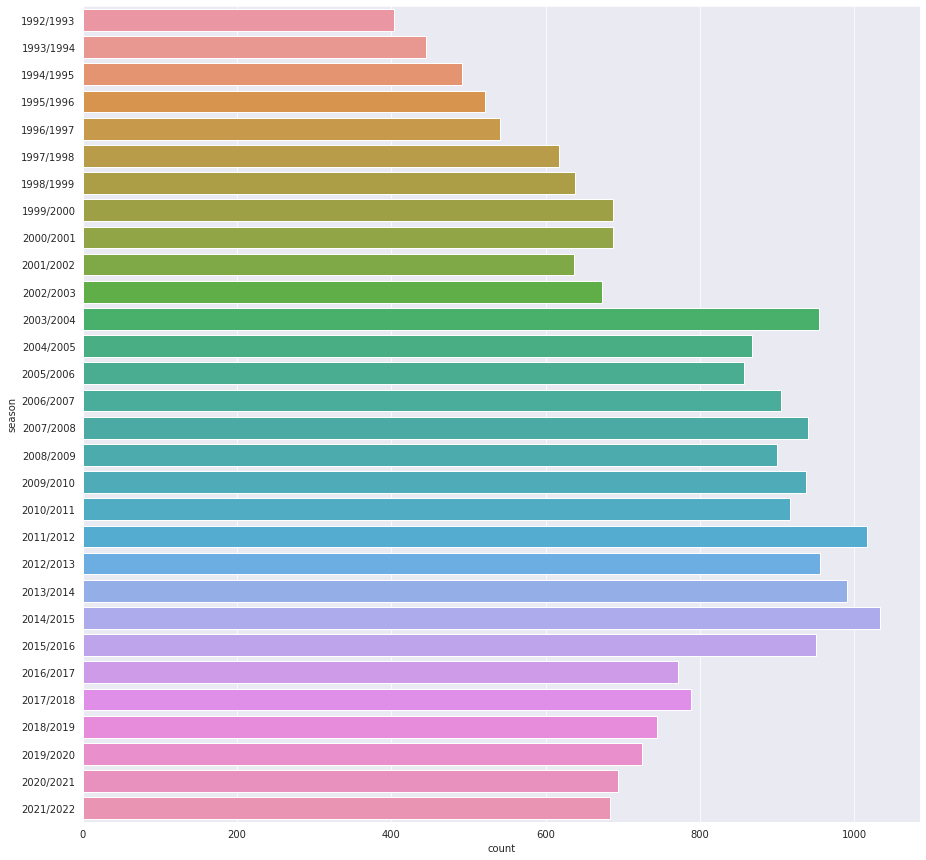

In [ ]:
# Every Season Transfers Count
plt.figure(figsize= (15,15))

sns.countplot(y=league['season'],data=league)

Text(0.5, 1.0, 'Total Gain For All Seasons')

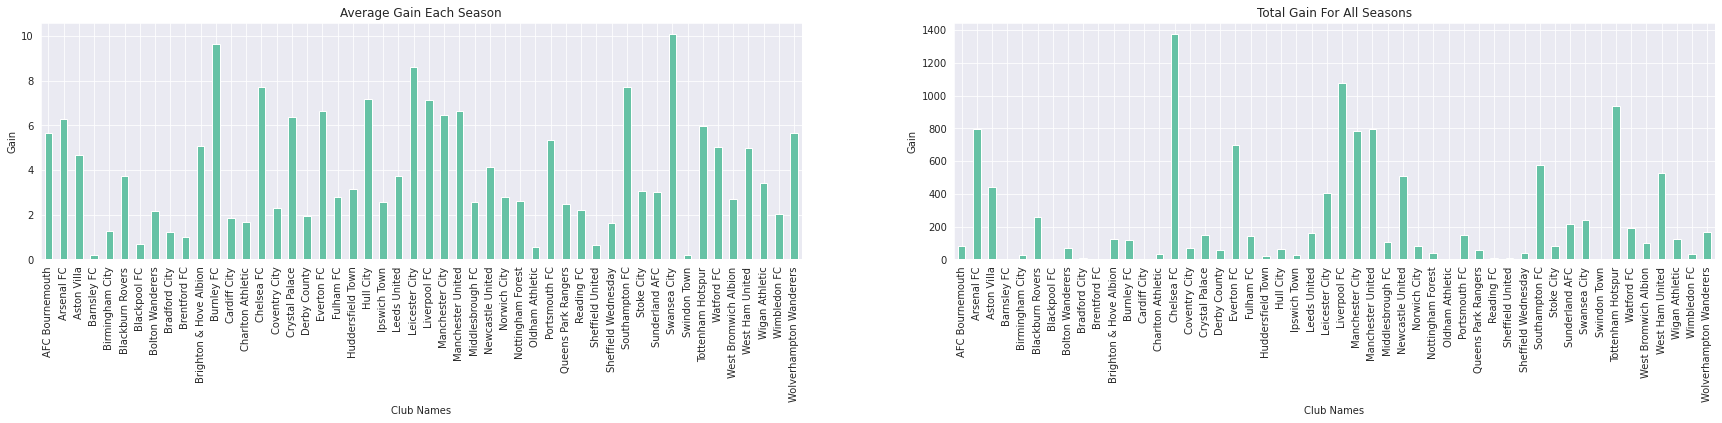

In [ ]:
#Total Money gained all time by each team
plt.figure(figsize= (30,20))
plt.subplot(4,2,1)
league.groupby(['club_name']).apply(lambda x: x[(x['transfer_movement'] == 'out')&(x['fee_cleaned']>0)]["fee_cleaned"].mean()).plot(kind = "bar")
plt.xlabel("Club Names")
plt.ylabel("Gain")
plt.title("Average Gain Each Season")

plt.subplot(4,2,2)
league.groupby(['club_name']).apply(lambda x: x[x['transfer_movement'] == 'out']["fee_cleaned"].sum()).plot(kind = "bar")
plt.xlabel("Club Names")
plt.ylabel("Gain")
plt.title("Total Gain For All Seasons")




Text(0.5, 1.0, 'Total Spent For All Seasons')

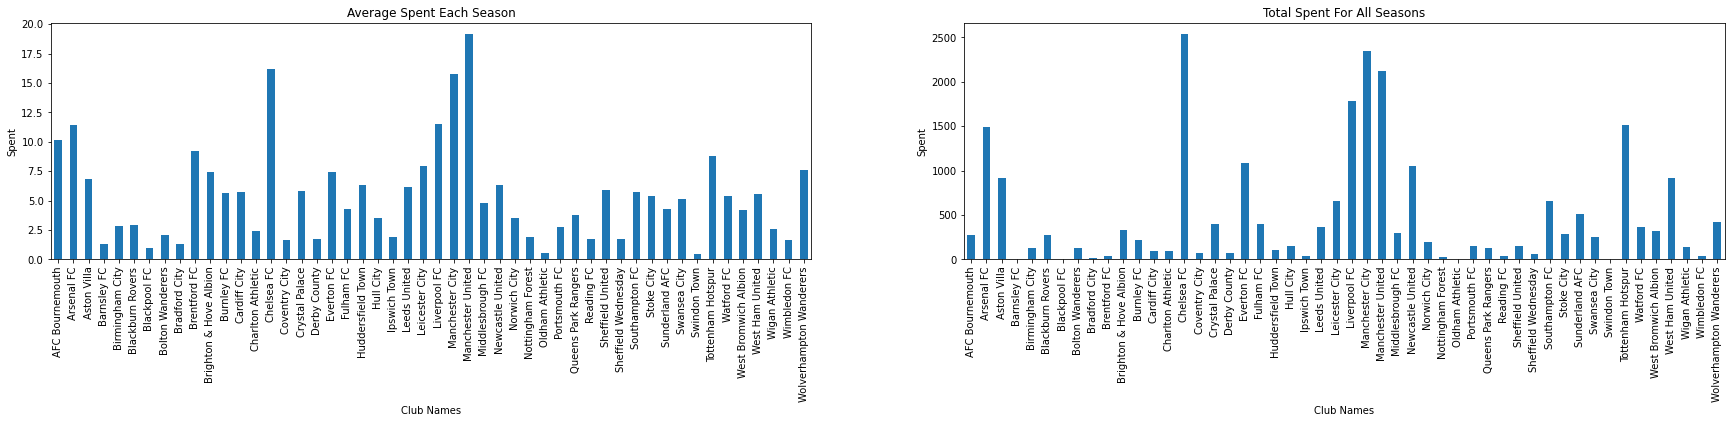

In [ ]:
#Total Money Spent by each team all time
plt.figure(figsize= (30,20))
plt.subplot(4,2,1)
league.groupby(['club_name']).apply(lambda x: x[(x['transfer_movement'] == 'in')&(x['fee_cleaned']>0)]["fee_cleaned"].mean()).plot(kind = "bar")
plt.xlabel("Club Names")
plt.ylabel("Spent")
plt.title("Average Spent Each Season")

plt.subplot(4,2,2)
league.groupby(['club_name']).apply(lambda x: x[x['transfer_movement'] == 'in']["fee_cleaned"].sum()).plot(kind = "bar")
plt.xlabel("Club Names")
plt.ylabel("Spent")
plt.title("Total Spent For All Seasons")



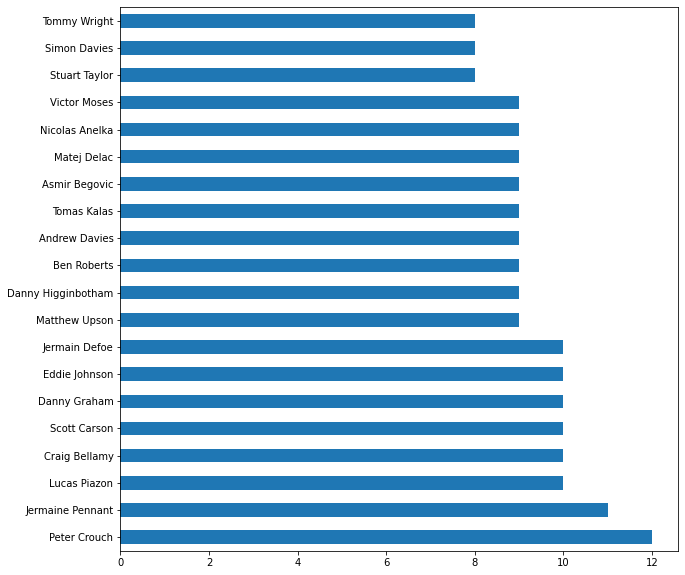

In [ ]:
#Most Player Transferred in or Out English Teams
plt.figure(figsize= (10,10))
x = league.drop_duplicates(
  subset = ['player_name','season'],
  keep = 'last').reset_index(drop = True)
x.player_name.value_counts().sort_values(ascending=False)[:20].plot(kind = 'barh')


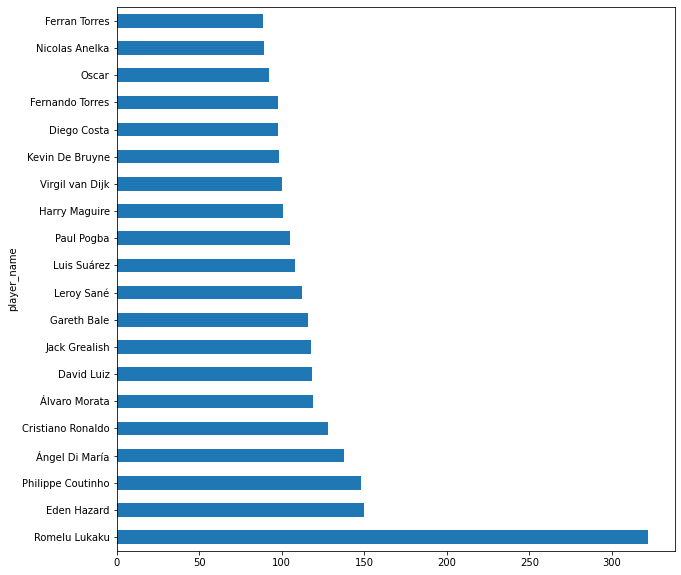

In [ ]:
#Most Valuabe Player to be transferred in or out (Cost=transfer1+transfer2+transfer3+...)
plt.figure(figsize= (10,10))
x = league.drop_duplicates(
  subset = ['player_name','season'],
  keep = 'last').reset_index(drop = True)
x.groupby(['player_name'])['fee_cleaned'].sum().sort_values(ascending=False).head(20).plot(kind = "barh")



,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,season
11308,Manchester United,Paul Pogba,23.0,Central Midfield,Juventus,€105.00m,in,Summer,105.0,2016/2017


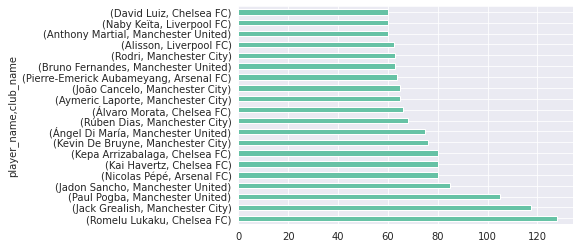

In [ ]:
#Most Expensive Player Bought by Enlgish Teams 
IN=x[x["transfer_movement"]=='in']
IN.groupby(['player_name','club_name'])['fee_cleaned'].sum().sort_values(ascending=False).head(20).plot(kind = "barh")


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,season


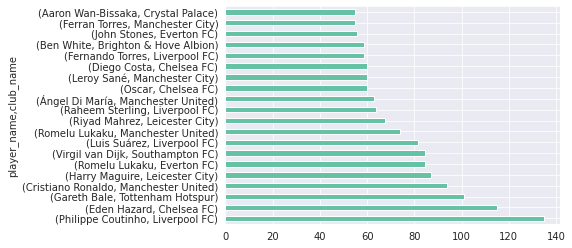

In [ ]:
#Most Expensive Players Sold By English Teams
Out=x[x["transfer_movement"]=='out']

Out.groupby(['player_name','club_name'])['fee_cleaned'].sum().sort_values(ascending=False).head(20).plot(kind = "barh")
Out[Out['player_name']=='Paul Pogba']


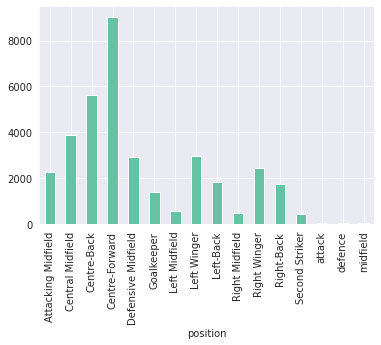

In [ ]:
#Relation between Postition and price of player
league.groupby(['position'])["fee_cleaned"].sum().plot(kind = "bar")

#Teams tend to buy center forward and center back the most


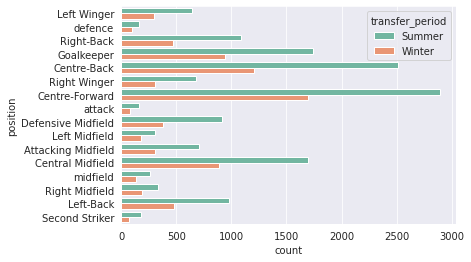

In [ ]:
#Relation between the need for Specific position during the whole season
sns.countplot(data=league, y="position", hue="transfer_period")
#Teams tends to buy Center forward,Center back, center midfield the most in winter"half of the season"

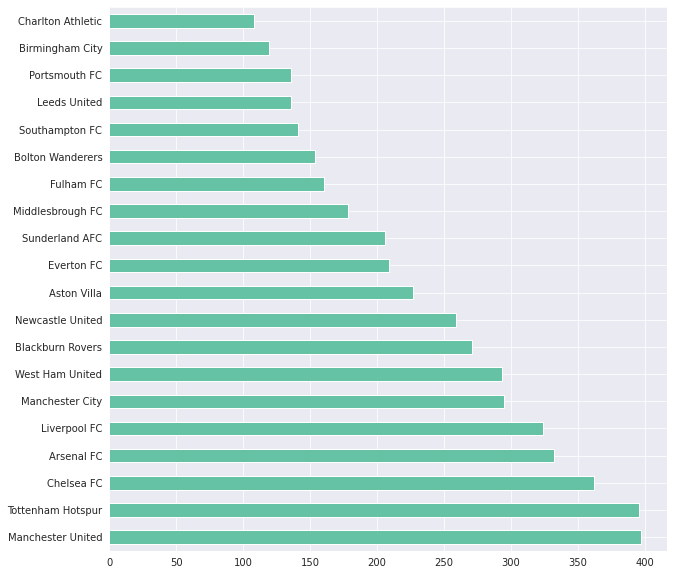

In [ ]:
#Relation between Age and teams

plt.figure(figsize= (10,10))
league.dropna(subset=['age'],inplace=True)
league.isna().sum()
young=league[league['age']<20]
young.club_name.value_counts().sort_values(ascending=False)[:20].plot(kind = 'barh')

#young.groupby(['club_name'])["age"].count().plot(kind = "barh")


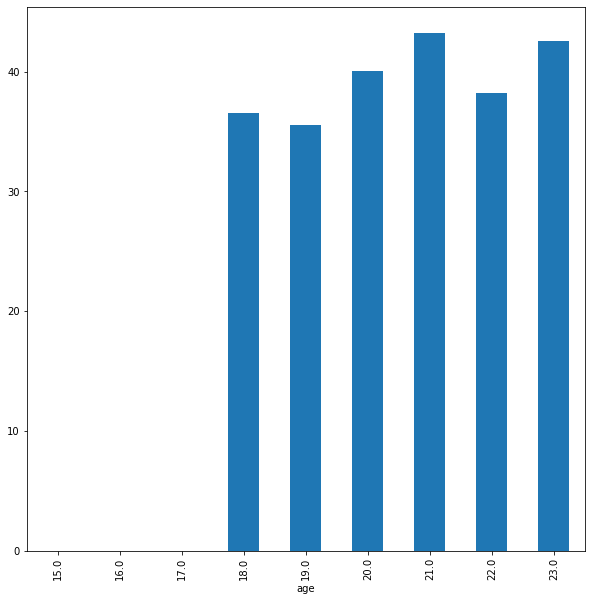

In [ ]:
#Relation between Age and cost 
plt.figure(figsize= (10,10))
arr=[]
young=league[league['age']<24]
expensive=young.groupby(['age']).apply(lambda x:x[x['fee_cleaned']>25] ["fee_cleaned"].mean()).plot(kind = "bar")
expensive

# for i in range(int(young['age'].min()),int(young['age'].max())+1,1):
#   arr.append(i)

# sns.countplot(data=expensive, y="fee_cleaned")
# # sns.countplot(x=young['age'],data=young)


